In [25]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import urllib
import json
import sys
import re
import os


In [ ]:
# Define the files and category we want to work with
# for now we are going to build category data manually


category = "Laptops"
walmartDataFile = "Walmart_datasets/walmart_Laptop_data_file2.csv"
bestBuyDataFile = "BestBuy_datasets/LaptopBestbuy.csv"

In [3]:
# # open and clean walmart data file
# filepath = os.path.join('Walmart_datasets/walmart_Laptop_data_file.csv')
# with open(filepath, 'r') as csvfile:
#     csvreader = csv.reader(csvfile, delimiter=',')
#     laptops_df = pd.DataFrame(csvreader)
    
# Raw data file
file_to_load = walmartDataFile
#file_to_load = "BestBuy_datasets/LaptopBestbuy.csv"


# Read purchasing file and store into pandas data frame
wal_category_df = pd.read_csv(file_to_load)
wal_category_df = wal_category_df.drop_duplicates()
wal_category_df = wal_category_df.drop(columns = ['categoryNode','categoryPath'])
#wal_laptop_df = wal_laptop_df[['itemId','customerRating', 'name', 'numReviews', 'salePrice','upc']]


wal_category_df

,Unnamed: 0,customerRating,itemId,largeImage,mediumImage,name,numReviews,parentItemId,salePrice,thumbnailImage,upc
0,0,4.667,322570741,https://i5.walmartimages.com/asr/a5ec9c67-9a09...,https://i5.walmartimages.com/asr/a5ec9c67-9a09...,HP Pavilion 15-cs0051wm 15.6 Touchscreen Lapto...,3,322570741,639.00,https://i5.walmartimages.com/asr/a5ec9c67-9a09...,192545383455
1,1,4.467,822597407,https://i5.walmartimages.com/asr/c9095299-7506...,https://i5.walmartimages.com/asr/c9095299-7506...,"HP Pavilion 15-br082wm X360 15.6"" Touchscreen ...",31,822597407,499.00,https://i5.walmartimages.com/asr/c9095299-7506...,192018968349
2,2,3.857,55499365,https://i5.walmartimages.com/asr/45426f9d-8ac4...,https://i5.walmartimages.com/asr/45426f9d-8ac4...,"SAMSUNG Chromebook Plus 12.3""Chrome OS 32GB eM...",56,55499365,429.95,https://i5.walmartimages.com/asr/45426f9d-8ac4...,887276183961
3,3,4.714,700792078,https://i5.walmartimages.com/asr/730c7807-89f9...,https://i5.walmartimages.com/asr/730c7807-89f9...,"HP 15-da053wm 15.6"" Touch Laptop, Windows 10 H...",14,700792078,559.00,https://i5.walmartimages.com/asr/730c7807-89f9...,192545383752
4,4,4.348,55009828,https://i5.walmartimages.com/asr/c0ab938b-41f5...,https://i5.walmartimages.com/asr/c0ab938b-41f5...,"Acer 15.6"" Chromebook CB5-571-C4G4, Intel Cele...",21,55009828,179.00,https://i5.walmartimages.com/asr/c0ab938b-41f5...,888863275496
5,5,3.551,55731619,https://i5.walmartimages.com/asr/351418ea-2da6...,https://i5.walmartimages.com/asr/351418ea-2da6...,"Lenovo ideapad 320 15.6"" Laptop, Windows 10, I...",139,55731619,319.99,https://i5.walmartimages.com/asr/351418ea-2da6...,191545914829
6,6,1.667,499099611,https://i5.walmartimages.com/asr/87722254-96e9...,https://i5.walmartimages.com/asr/87722254-96e9...,"Lenovo ideapad 330 15.6"" Laptop, Windows 10, I...",3,499099611,349.00,https://i5.walmartimages.com/asr/87722254-96e9...,192563997221
7,7,4.182,937522935,https://i5.walmartimages.com/asr/58dcb872-b0d2...,https://i5.walmartimages.com/asr/58dcb872-b0d2...,"HP Jaguar 15-bs060wm, 15.6"" Touch Natural Silv...",22,937522935,442.99,https://i5.walmartimages.com/asr/58dcb872-b0d2...,190781885658
8,8,0.000,179807165,https://i5.walmartimages.com/asr/730c7807-89f9...,https://i5.walmartimages.com/asr/730c7807-89f9...,"HP 15-da0033wm 15.6"" Touch Laptop, Windows 10 ...",0,179807165,469.00,https://i5.walmartimages.com/asr/730c7807-89f9...,192545382540
9,9,4.061,54518466,https://i5.walmartimages.com/asr/f3077845-8786...,https://i5.walmartimages.com/asr/f3077845-8786...,"Acer CB3-532-C47C 15.6"" Chromebook, Chrome OS,...",198,54518466,169.00,https://i5.walmartimages.com/asr/f3077845-8786...,888863811427


In [4]:
# Read the BestBuy category data into memory & place into a df
# Note that BestBuy and Walmart have different fields
# We want to track those in common
bestBuy_category_df = pd.read_csv(bestBuyDataFile)
bestBuy_category_df.head()

,customerReviewAverage,customerReviewCount,inStoreAvailability,manufacturer,name,onlineAvailability,regularPrice,salePrice,upc
0,1.0,1.0,False,Dell,"Dell - Latitude 14"" Refurbished Laptop - Intel...",False,269.99,269.99,812177024433
1,1.0,1.0,True,Acer,"Acer - Chromebook 14"" Chromebook - Intel Celer...",True,329.00,305.99,888863818631
2,1.0,1.0,False,HP,"HP - EliteBook 14"" Refurbished Laptop - Intel ...",False,264.99,264.99,825633345669
3,1.0,1.0,False,Lenovo,"Lenovo - ThinkPad 14"" Refurbished Laptop - Int...",False,223.99,223.99,825633384934
4,1.0,2.0,True,Lenovo,"Lenovo - ThinkPad 14.1"" Refurbished Laptop - I...",True,224.99,224.99,812177027830


In [5]:
# Define the category that we want to work with
# For now, we will Iterate through categories manually
# Later, if we have time, we can apply more automation

# Use two iterrow commands to create a list of items common to both Walmart and BestBuy
# create a dictionary of all walmart UPS values within the data set
wal_category_data = {}
for index, row in wal_category_df.iterrows():
   wal_category_data[row["upc"]]=row

# compare the Best Buy data to the Walmart UPC Vlaue
compare_data = []
for index, row in bestBuy_category_df.iterrows():
    query = row["upc"]
    if query in wal_category_data:
        
        #if BestBuy is found in Walmart, create a dictionary to store combined values
        new_data = {
           "UPC":query,
           "Category": category,
            "Product":row["name"],
            "BestBuy_Price":row["salePrice"],
           "BestBuy_ReviewCount":row["customerReviewCount"],
           "BestBuy_ReviewAverage":row["customerReviewAverage"],
           "Walmart_Price":wal_category_data[query]["salePrice"],
           "Walmart_ReviewCount":wal_category_data[query]["numReviews"],
           "Walmart_ReviewAverage":wal_category_data[query]["customerRating"],
            "Price_Difference": 0
        }
        compare_data.append(new_data)
        #print(wal_laptop_data[query])

#Load combined value dictionary into a dataframe
#column names will be in alphabetical order
compare_pd = pd.DataFrame(compare_data)

#convert NaN values to 0, so we can work with data
compare_pd=compare_pd.fillna(0)

#reorder the columns to an order that makes more sense
compare_df=compare_pd[["Product","Category", "UPC","BestBuy_Price","Walmart_Price","Price_Difference", "BestBuy_ReviewCount","Walmart_ReviewCount","BestBuy_ReviewAverage","Walmart_ReviewAverage"]]


compare_df

,Product,Category,UPC,BestBuy_Price,Walmart_Price,Price_Difference,BestBuy_ReviewCount,Walmart_ReviewCount,BestBuy_ReviewAverage,Walmart_ReviewAverage
0,"Acer - Chromebook 14"" Chromebook - Intel Celer...",Laptops,888863818631,305.99,343.27,0,1.0,2,1.0,5.000
1,"Dell - Inspiron 2-in-1 11.6"" Touch-Screen Lapt...",Laptops,884116292760,249.99,199.00,0,2.0,131,1.0,3.168
2,"Lenovo - N42-20 Touch 14"" Touch-Screen Chromeb...",Laptops,190725235860,269.99,265.05,0,1.0,0,2.0,0.000
3,"Dell - XPS 13.3"" 4K Ultra HD Touch-Screen Lapt...",Laptops,884116277187,1399.99,1399.00,0,1.0,1886,2.0,4.062
4,"Dell - 11.6"" Chromebook - Intel Celeron - 4GB ...",Laptops,884116261827,231.99,246.95,0,2.0,1,2.5,5.000
5,"HP - 2-in-1 15.6"" Touch-Screen Laptop - Intel ...",Laptops,190781857051,623.99,599.99,0,5.0,0,3.0,0.000
6,"Acer - Predator Helios 300 15.6"" Laptop - Inte...",Laptops,191114286456,1399.99,1199.00,0,5.0,0,3.0,0.000
7,"Alienware - R3 13.3"" Laptop - Intel Core i7 - ...",Laptops,884116254799,1300.99,1259.99,0,4.0,5,3.5,3.600
8,"ASUS - 17.3"" Laptop - Intel Core i7 - 8GB Memo...",Laptops,889349839492,899.99,790.00,0,6.0,0,3.5,0.000
9,"Lenovo - ThinkPad 12"" Refurbished Laptop - Int...",Laptops,812177027960,250.99,231.00,0,6.0,2,3.7,3.500


In [12]:
#Add some columns to make valide comparisons

#Add difference in price which gives a quick glance at variance
compare_df["Price Delta (B-W)"] = compare_df.loc[:,"BestBuy_Price"]-compare_df.loc[:,"Walmart_Price"]
compare_df["Price Delta (W-B)"] = compare_df.loc[:,"Walmart_Price"]-compare_df.loc[:,"BestBuy_Price"]

#Add combined reviews so we can elminate products that don't have a lot of reviews
compare_df["Combined_Reviews"] = compare_df.loc[:,"BestBuy_ReviewCount"]+compare_df.loc[:,"Walmart_ReviewCount"]

#sort by highest price to provide some order when reviewing
compare_df=compare_df.sort_values(by = ['BestBuy_Price'], ascending=False)

#store combined value df into a csv file
filename=category
compare_df.to_csv(f"combined_datasets/{filename}_compare_data.csv", sep=',')

compare_df.head(10)

C:\Users\craigpreid\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\Users\craigpreid\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
C:\Users\craigpreid\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http:/

,Product,Category,UPC,BestBuy_Price,Walmart_Price,Price_Difference,BestBuy_ReviewCount,Walmart_ReviewCount,BestBuy_ReviewAverage,Walmart_ReviewAverage,Price Delta (B-W),Price Delta (W-B),Combined_Reviews
27,"MSI - 17.3"" 4K Ultra HD Laptop - Intel Core i9...",Laptops,824142161609,4499.99,4499.00,0,5.0,0,4.2,0.000,0.99,-0.99,5.0
54,"Apple - MacBook Pro® - 15"" Display - Intel Co...",Laptops,190198373977,2399.99,2599.00,0,880.0,0,4.8,0.000,-199.01,199.01,880.0
48,"Dell - XPS 13.3"" 4K Ultra HD Touch-Screen Lapt...",Laptops,884116305040,2049.99,1849.00,0,4.0,1916,4.5,4.061,200.99,-200.99,1920.0
57,"Lenovo - ThinkPad 17.3"" Laptop - Intel Core i7...",Laptops,190151081857,1831.99,1831.99,0,2.0,0,5.0,0.000,0.00,0.00,2.0
43,"Lenovo - 2-in-1 14"" Touch-Screen Laptop - Inte...",Laptops,190151427211,1743.99,1499.95,0,2.0,0,4.5,0.000,244.04,-244.04,2.0
69,"Dell - XPS 13.3"" 4K Ultra HD Touch-Screen Lapt...",Laptops,884116277392,1629.99,1599.00,0,1.0,0,5.0,0.000,30.99,-30.99,1.0
110,"Alienware - 15.54"" Laptop - Intel Core i7 - 16...",Laptops,884116293675,1619.99,1389.00,0,0.0,0,0.0,0.000,230.99,-230.99,0.0
58,"Alienware - 15.6"" Laptop - Intel Core i7 - 16G...",Laptops,884116255338,1615.99,1559.99,0,3.0,15,5.0,3.733,56.00,-56.00,18.0
79,"Alienware - 17.3"" Laptop - Intel Core i7 - 8GB...",Laptops,884116254720,1593.99,1747.02,0,0.0,0,0.0,0.000,-153.03,153.03,0.0
115,"LG - gram 14"" Touch-Screen Laptop - Intel Core...",Laptops,719192618930,1549.99,1396.99,0,0.0,5,0.0,4.200,153.00,-153.00,5.0


# Visualizing the Product Data Frame
Below we will see how we can analyze the data we have pulled out of Walmart & Best Buy

Since we do not have sales data, we will use number of review to represent an indicator of 
commercial activity

*Hypotheses*
1. Greater number of reviews will mean systematically lower prices
If true, our thought is that this is because the company is using some sort of promotion
(which this app cannot see). Lower price would be part of the promotion

2. For similar reason, we do not expect to see many both companies have a high number of reviews
for products with less brand power such as laptops.  Best Buy and Walmart will be selling 
different products in similar catoegories

3. Conversely, when we inspect products with greater brand power such as the iPhone
we do expect to see high numbers of reviews for both retailers

*Datasources*
The structure of the application is that we need to build a database by product category, one at 
a time. As such laptops, tablets, TVs, etc. will have separate csvfiles for now.  We will build
the files manually above. We will read and visualize the files in the section below.

*Categories*  -- use this section to store and replace category names
Laptops

In [26]:
# Open the file we want to work with.  See above to get categories stored so far
category = "Laptops"
visualizeFile = (f"combined_datasets/{category}_compare_data.csv")
vis_category_df = pd.read_csv(visualizeFile)

# Only visualize reviews > 5 entries
vis_category_df = vis_category_df[vis_category_df["Combined_Reviews"] > 5]

vis_category_df.head(2)

,Unnamed: 0,Product,Category,UPC,BestBuy_Price,Walmart_Price,Price_Difference,BestBuy_ReviewCount,Walmart_ReviewCount,BestBuy_ReviewAverage,Walmart_ReviewAverage,Price Delta (B-W),Price Delta (W-B),Combined_Reviews
1,54,"Apple - MacBook Pro® - 15"" Display - Intel Co...",Laptops,190198373977,2399.99,2599.0,0,880.0,0,4.8,0.000,-199.01,199.01,880.0
2,48,"Dell - XPS 13.3"" 4K Ultra HD Touch-Screen Lapt...",Laptops,884116305040,2049.99,1849.0,0,4.0,1916,4.5,4.061,200.99,-200.99,1920.0


<function matplotlib.pyplot.show(*args, **kw)>

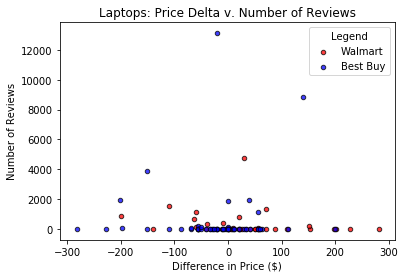

<Figure size 7200x4680 with 0 Axes>

In [45]:
# test hypothesis 1
# Create scatter plot to compare # reviews v. price delta

# first plot Best Buy Data
x_axis = vis_category_df['Price Delta (B-W)']
y_axis = vis_category_df['BestBuy_ReviewCount']

plt.scatter(x_axis, y_axis, marker="o", facecolors="red", edgecolors="black",
s=20, alpha=0.75)

# then overlay the Walmart Data
x_axis = vis_category_df['Price Delta (W-B)']
y_axis = vis_category_df['Walmart_ReviewCount']
plt.scatter(x_axis, y_axis, marker="o", facecolors="blue", edgecolors="black",
s=20, alpha=0.75)


plt.title("Laptops: Price Delta v. Number of Reviews")
plt.xlabel("Difference in Price ($)")
plt.ylabel("Number of Reviews")
plt.legend(labels = ('Walmart' , 'Best Buy'), title = "Legend", loc='upper right')

plt.figure(figsize=(100,65))

plt.savefig("Images/laptop_price_reviews.png")

plt.show

In [13]:
#Only look at items that havea a combined review count above 5
#For example, we do not want to include Avg reviews of items with < 5 reviews
compare_moreReviews_df = compare_df[compare_df["Combined_Reviews"] > 5]

compare_df

,Product,Category,UPC,BestBuy_Price,Walmart_Price,Price_Difference,BestBuy_ReviewCount,Walmart_ReviewCount,BestBuy_ReviewAverage,Walmart_ReviewAverage,Price Delta (B-W),Price Delta (W-B),Combined_Reviews
27,"MSI - 17.3"" 4K Ultra HD Laptop - Intel Core i9...",Laptops,824142161609,4499.99,4499.00,0,5.0,0,4.2,0.000,0.99,-0.99,5.0
54,"Apple - MacBook Pro® - 15"" Display - Intel Co...",Laptops,190198373977,2399.99,2599.00,0,880.0,0,4.8,0.000,-199.01,199.01,880.0
48,"Dell - XPS 13.3"" 4K Ultra HD Touch-Screen Lapt...",Laptops,884116305040,2049.99,1849.00,0,4.0,1916,4.5,4.061,200.99,-200.99,1920.0
57,"Lenovo - ThinkPad 17.3"" Laptop - Intel Core i7...",Laptops,190151081857,1831.99,1831.99,0,2.0,0,5.0,0.000,0.00,0.00,2.0
43,"Lenovo - 2-in-1 14"" Touch-Screen Laptop - Inte...",Laptops,190151427211,1743.99,1499.95,0,2.0,0,4.5,0.000,244.04,-244.04,2.0
69,"Dell - XPS 13.3"" 4K Ultra HD Touch-Screen Lapt...",Laptops,884116277392,1629.99,1599.00,0,1.0,0,5.0,0.000,30.99,-30.99,1.0
110,"Alienware - 15.54"" Laptop - Intel Core i7 - 16...",Laptops,884116293675,1619.99,1389.00,0,0.0,0,0.0,0.000,230.99,-230.99,0.0
58,"Alienware - 15.6"" Laptop - Intel Core i7 - 16G...",Laptops,884116255338,1615.99,1559.99,0,3.0,15,5.0,3.733,56.00,-56.00,18.0
79,"Alienware - 17.3"" Laptop - Intel Core i7 - 8GB...",Laptops,884116254720,1593.99,1747.02,0,0.0,0,0.0,0.000,-153.03,153.03,0.0
115,"LG - gram 14"" Touch-Screen Laptop - Intel Core...",Laptops,719192618930,1549.99,1396.99,0,0.0,5,0.0,4.200,153.00,-153.00,5.0


In [23]:
# These are the items we are going to compare across categories of products
productCount = compare_df["Product"].count()
reviewsOver5 = compare_moreReviews_df["Product"].count()
walmartPriceAvg = round(compare_df["Walmart_Price"].mean(),1)
bestBuyAvgPrice = round(compare_df["BestBuy_Price"].mean(),1)
walmartReviewAvg = round(compare_moreReviews_df["Walmart_ReviewAverage"].mean(),1)
bestBuyReviewAvg = round(compare_moreReviews_df["BestBuy_ReviewAverage"].mean(),1)
totalWalmartReviews = compare_df["Walmart_ReviewCount"].sum()
totalBestBuyReviews = compare_df["BestBuy_ReviewCount"].sum()

#Create a dataframe to hold the data we calculated above
category_array = []
category_data = {
    "Category" : category,
    "Reviews Over 5" : reviewsOver5,
    "Total Common Products" : productCount,
    "Walmart Avg Price" : int(walmartPriceAvg),
    "Best Buy Avg Price" : int(bestBuyAvgPrice),
    "Total Walmart Reviews" : totalWalmartReviews,
    "Total Best Buy Reviews" : int(totalBestBuyReviews),
    "Walmart Review Avg" : walmartReviewAvg,
    "Best Buy Review Avg" : bestBuyReviewAvg
    
}

category_array.append(category_data)
category_df = pd.DataFrame(category_array)
category_df = category_df[[
    "Category", "Total Common Products", "Reviews Over 5", "Walmart Avg Price", 
    "Best Buy Avg Price", "Total Walmart Reviews","Total Best Buy Reviews", "Walmart Review Avg", "Best Buy Review Avg"
]]

# Define the category that we want to work with
# For now, we will Iterate through categories manually
# Later, if we have time, we can apply more automation

# Use two iterrow commands to create a list of items common to both Walmart and BestBuy
# create a dictionary of all walmart UPS values within the data set
wal_category_data = {}
for index, row in wal_category_df.iterrows():
   wal_category_data[row["upc"]]=row

# compare the Best Buy data to the Walmart UPC Vlaue
compare_data = []
for index, row in bestBuy_category_df.iterrows():
    query = row["upc"]
    if query in wal_category_data:
        
        #if BestBuy is found in Walmart, create a dictionary to store combined values
        new_data = {
           "UPC":query,
           "Category": category,
            "Product":row["name"],
            "BestBuy_Price":row["salePrice"],
           "BestBuy_ReviewCount":row["customerReviewCount"],
           "BestBuy_ReviewAverage":row["customerReviewAverage"],
           "Walmart_Price":wal_category_data[query]["salePrice"],
           "Walmart_ReviewCount":wal_category_data[query]["numReviews"],
           "Walmart_ReviewAverage":wal_category_data[query]["customerRating"],
            "Price_Difference": 0
        }
        compare_data.append(new_data)
        #print(wal_laptop_data[query])

#Load combined value dictionary into a dataframe
compare_pd = pd.DataFrame(compare_data)

#convert NaN values to 0, so we can work with data
compare_pd=compare_pd.fillna(0)

#reorder the columns to an order that makes more sense
compare_df=compare_pd[[
    "Product","Category", "UPC","BestBuy_Price","Walmart_Price",
    "Price_Difference", "BestBuy_ReviewCount","Walmart_ReviewCount",
    "BestBuy_ReviewAverage","Walmart_ReviewAverage"
]]

import csv
# store combined value df into a csv file
# we will do this ONE TIME, then turn off and use the append routine below
category_df.to_csv("combined_datasets/category_compare.csv", sep=',')

# use this routine to add additional categories to compare
#category_df.to_csv("combined_datasets/category_compare.csv", sep=',', header=None, mode='a')

new_df = pd.read_csv("combined_datasets/category_compare.csv")
new_df

,Unnamed: 0,Category,Total Common Products,Reviews Over 5,Walmart Avg Price,Best Buy Avg Price,Total Walmart Reviews,Total Best Buy Reviews,Walmart Review Avg,Best Buy Review Avg
0,0,Laptops,117,47,714,736,33492,12811,2.9,4.1


In [ ]:
walmartReviewAvg
